In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_train = pd.read_csv('../data/downloads_drivendata/dengue_features_train.csv')
df_test = pd.read_csv('../data/downloads_drivendata/dengue_features_test.csv')
labels_train = pd.read_csv('../data/downloads_drivendata/dengue_labels_train.csv')
submission_format = pd.read_csv('../data/downloads_drivendata/submission_format.csv')
df_train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [5]:
df_train.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


In [23]:
df_test.isna().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                  43
ndvi_nw                                  11
ndvi_se                                   1
ndvi_sw                                   1
precipitation_amt_mm                      2
reanalysis_air_temp_k                     2
reanalysis_avg_temp_k                     2
reanalysis_dew_point_temp_k               2
reanalysis_max_air_temp_k                 2
reanalysis_min_air_temp_k                 2
reanalysis_precip_amt_kg_per_m2           2
reanalysis_relative_humidity_percent      2
reanalysis_sat_precip_amt_mm              2
reanalysis_specific_humidity_g_per_kg     2
reanalysis_tdtr_k                         2
station_avg_temp_c                       12
station_diur_temp_rng_c                  12
station_max_temp_c                        3
station_min_temp_c              

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1456 entries, 0 to 1430
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  reanalysi

In [449]:
print('### SOME PRELIMINARY INFO ###')
print(f"- The dataset contains {df_train.shape[0]} rows and {df_train.shape[1]} columns.")
print(f"- The time component includes time from {df_train.year.min()} to {df_train.year.max()}")
print(f"- We have {df_train.city.value_counts().nunique()} cities to look at:")
print(df_train.city.value_counts())

### SOME PRELIMINARY INFO ###
- The dataset contains 1456 rows and 24 columns.
- The time component includes time from 1990 to 2010
- We have 2 cities to look at:
city
sj    936
iq    520
Name: count, dtype: int64


## Null values

In [450]:
df_train.isna().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [451]:
# df_train.groupby('year').mean('ndvi_ne')['ndvi_ne'].plot.line()
# FILLED PIXEL VALUES WITH FFILL BECAUSE OF TIME COMPONENT
df_train['ndvi_ne'] = df_train['ndvi_ne'].fillna(method='ffill')
df_train['ndvi_nw'] = df_train['ndvi_nw'].fillna(method='ffill')
df_train['ndvi_se'] = df_train['ndvi_se'].fillna(method='ffill')
df_train['ndvi_sw'] = df_train['ndvi_sw'].fillna(method='ffill')

/tmp/ipykernel_16456/2534025100.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_train['ndvi_ne'] = df_train['ndvi_ne'].fillna(method='ffill')
/tmp/ipykernel_16456/2534025100.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_train['ndvi_nw'] = df_train['ndvi_nw'].fillna(method='ffill')
/tmp/ipykernel_16456/2534025100.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_train['ndvi_se'] = df_train['ndvi_se'].fillna(method='ffill')
/tmp/ipykernel_16456/2534025100.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_train['ndvi_sw'] = df_train['ndvi_sw'].fillna(method='ffill')


In [452]:
float_columns = df_train.select_dtypes('float64').columns
float_columns

Index(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
       'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [453]:
for col in float_columns:
   df_train[col] = df_train[col].fillna(df_train[col].mean())

In [454]:
#null_index = df_train[df_train.isna().any(axis=1)].index
#labels_train = labels_train.drop(null_index, axis=0)
#df_train = df_train.dropna(axis=0)
#labels_train.shape, df_train.shape

## Datatypes

In [455]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1456 entries, 0 to 1430
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1456 non-null   float64
 5   ndvi_nw                                1456 non-null   float64
 6   ndvi_se                                1456 non-null   float64
 7   ndvi_sw                                1456 non-null   float64
 8   precipitation_amt_mm                   1456 non-null   float64
 9   reanalysis_air_temp_k                  1456 non-null   float64
 10  reanalysis_avg_temp_k                  1456 non-null   float64
 11  reanalysi

In [456]:
# DROP WEEK START DATE BECAUSE IT SEEMS SUPERFLUOUS
df_train = df_train.drop(['week_start_date'], axis=1)

In [457]:
df_train['city'] = df_train['city'].astype('category')

## Encoding

In [458]:
import category_encoders as ce

In [459]:
ce_ohe = ce.OneHotEncoder(cols=['city'])
df_train = ce_ohe.fit_transform(df_train)
df_train.head()

,city_1,city_2,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,1,0,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,1,0,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,1,0,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,1,0,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,1,0,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [460]:
# Null values ERLEDIGT
# Datatypes DONE
# Encoding DONE
# Random Forest
# Submission

In [461]:
labels_train.nunique()

city             2
year            21
weekofyear      53
total_cases    135
dtype: int64

In [462]:
labels_train['total_cases']

0       4
1       5
2       4
3       3
4       6
       ..
1451    5
1452    8
1453    1
1454    1
1455    4
Name: total_cases, Length: 1456, dtype: int64

In [463]:
X = df_train.copy()
y = labels_train['total_cases']

In [464]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error

In [475]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42, shuffle=False)

In [476]:
rf = RandomForestRegressor(max_depth=5, random_state=42)
rf.fit(X_train, y_train)

In [477]:
rf_preds = rf.predict(X_val)
rf_preds_int = [round(x) for x in rf_preds]
mean_absolute_error(y_val, rf_preds_int)

7.513698630136986

## Submission

In [ ]:
df_test = df_test.drop(['week_start_date'],axis=1)
ce_ohe = ce.OneHotEncoder(cols=['city'])
df_test = ce_ohe.fit_transform(df_test)

In [481]:
submission_predictions = rf.predict(df_test)
submission_predictions = [round(x) for x in submission_predictions]

In [483]:
submission_format['total_cases'] = submission_predictions
submission_format

,city,year,weekofyear,total_cases
0,sj,2008,18,7
1,sj,2008,19,8
2,sj,2008,20,7
3,sj,2008,21,7
4,sj,2008,22,9
...,...,...,...,...
411,iq,2013,22,7
412,iq,2013,23,7
413,iq,2013,24,7
414,iq,2013,25,8


In [484]:
submission_format.to_csv('submissions_3.csv',sep=',',index=None)

In [486]:
pred1 = pd.read_csv('submissions_1')
pred2 = pd.read_csv('submissions_2')
pred3 = pd.read_csv('submissions_3.csv')

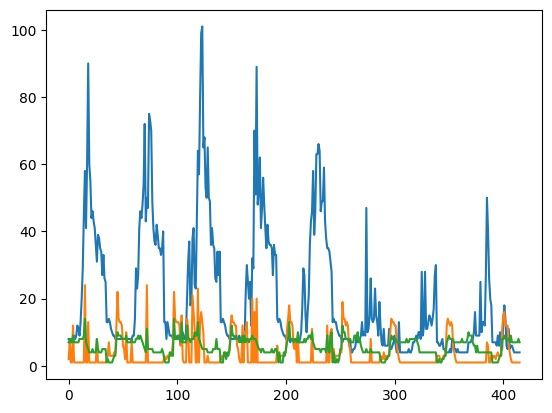

In [487]:
plt.plot(pred1.loc[:, 'total_cases'])
plt.plot(pred2.loc[:, 'total_cases'])
plt.plot(pred3.loc[:, 'total_cases'])
plt.show()

In [1]:
df_train

NameError: name 'df_train' is not defined

In [31]:
labels_train['total_cases'].values.ravel()

array([4, 5, 4, ..., 1, 1, 4])